<a href="https://colab.research.google.com/github/myazdani/pytorch-deep-learning/blob/master/pytorch_chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2
# Least squares

We have $N$ input and output pairs $(x_i, y_i)$ for $i = 1, \ldots, N$. We can express the entire relationship beteween $y$ and $x$ for these $N$ points as:

$ \begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots\\ 
y_N
\end{bmatrix} 
= \begin{bmatrix}
1 & x_1\\ 
1 & x_2\\ 
\vdots & \vdots \\ 
1 & x_N 
\end{bmatrix} \begin{bmatrix}
b & m 
\end{bmatrix} + \epsilon$

This is just a compact way of expressing the relationship between the input and output as a linear equation with two parameters (the intercept $b$ and the slope $m$) plus some error $\epsilon$ that is left over. The column of 1's is usually referred to as the bias term and we need it to get the math to work out. We would like to find $b$ and $m$ so that $\epsilon$ is as small as possible. We can write the above more compactly as

$\textbf{y} = \textbf{X}\textbf{w} + \mathbf{\epsilon}$ 

where we have lumped all of the $y_i$ to $\textbf{y}$, and the $x_{i}$ along with the bias to $\textbf{X}$. We have also introduced the common notation of $\textbf{w}$ as the "weights" (another term for parameter) that correspond to the intercept $b$ and the slope $m$. Using this compact notation we can express the MSE as:

$MSE = \frac{1}{N}(\textbf{X}\textbf{w} - \textbf{y})^{T} (\textbf{X}\textbf{w} - \textbf{y})$

Lets take the derivative (technically gradient) of this function:

$\frac{\partial MSE}{\partial\textbf{w}} = \frac{2}{N}(\textbf{X}\textbf{w} - \textbf{y})^{T} \textbf{X}$ 

# Implementing Linear Regression using SGD

Though the ideas of linear regression and least squares date back centuries (often attribute to Carl Friedrich Gauss in 1795), it still to this day serves as a foundation of building more complex models. Understanding the details of linear regression and least squares will enable to understand non-linear regression and classification, and many more sophisticated topics in Supervised and Unsupervised machine learning.  

Everyone who has completed high school math, had to at some point deal with the equatoin of a straight line: $y = mx + b$ 

![alt text](https://www.mathsisfun.com/algebra/images/y-mxpb-graph.svg)

Understanding how this equation works and the intuition behind the $m$ and $b$ (called the slope and intercept in our simple case) is critical for undertanding deep neural networks. From a machine learning perspective we can think of this simple equation we learned in high school as taking a value $x$ as input and producing the output $y$. More explicitly, you will see people express this mathematically as $y = f(x)$ where $y$ is our "output" and $x$ is our "input,"" and $f$ is the "machine learning model" represesented as a mathematical function. 

In our case $f(x) = mx + b$, a linear function of $x$. Often to be more precises, people will also write $f_{\theta}(x)$ to specify that our model function is *parametrized* by a set of "parameters" or "weights." It is very common to use terms such as this to describe the machine learning model. In our simple case, the parameters or weights are simple the slow $m$ and the intercept $b$. Our simple example only has two parameters. Modern machine learning algorithms can have many millions!


But so far the linear model that we have presented is just a mathematical construct. We can use it describe the input and output of a process that we care about. As an example, lets consider the relationship between Body Mass Index (BMI) and the severity of diabetes progression. We would like to know, for a given BMI how much has diabetes progressed.

Measuring BMI is easy: it is just your weight (kg) divide by your height (m) squared. Measuring the severity of diabetes progression on the other hand is rather involved with getting additional tests and lab reults from medical staff. If we can build a model that can predict the severtiy of diabetes from something as simple as BMI, then we can lower costs and times in health care. 

In [0]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

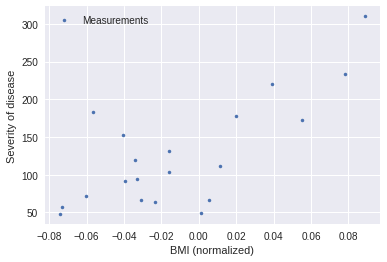

In [0]:
diabetes = datasets.load_diabetes()
BMI = diabetes.data[-20:, np.newaxis, 2]
response = diabetes.target[-20:]

plt.plot(BMI, response, '.', label = "Measurements");
plt.legend();
plt.xlabel("BMI (normalized)")
plt.ylabel("Severity of disease");

Above we show a plot of a sample of inputs (BMI) and outputs (severity of disease). Of course in the real world we will have a lot more than just one input. We may want to also consider a patients age, gender, previous health histories, and a host of other variables. As you can imagine, accounting for additional variables will usually help with making predictions (though we may have to be careful by using *too much* information from obtaining *spurious* relationships. This is where designing an appropriate loss function becomes critical). If there was a scenario where there really was only *one* input variable, then machine learning essentially becomes classical statistics and the solutions for solving such problems have been well understood.

From the chart, we might think that we could explain the relationship between the inputs and outputs using a linear equation. Even if you think we should use something more sophisticated, usually having a simple model (high bias, but low variance) such as a linear model helps us establish baselines. 

The linear model only has two parameters: slope and intercept. Let's guess some values for the slope and intercepts and see how we do:

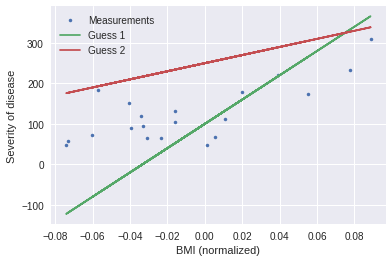

In [0]:
plt.plot(BMI, response, '.', label = "Measurements");
plt.plot(BMI, 3000*BMI + 100, label = "Guess 1")
plt.plot(BMI, 1000*BMI + 250, label = "Guess 2")
plt.legend();
plt.xlabel("BMI (normalized)")
plt.ylabel("Severity of disease");


Above we are showing two guesses with two different lines having different slopes and intercepts. It is hard to say which line describes our data better and it is pretty cumbersome to keep guessing random lines and plotting it against our data. 

This is where we would like to *quantiatively* measure the error of our guessed line. There are many ways of making such a quantiative measure. Let's consider one of the oldest and most popular measures of error: the mean squared error or MSE. In the MSE, we measure "how far" each of data point is from the prediction of the line that we have guessed. Below we should how how far each of the points are for the first guess line that we made. 

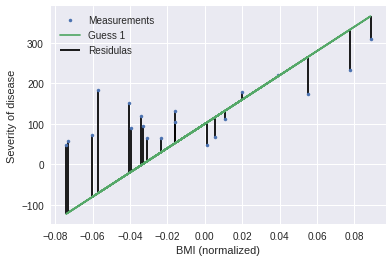

In [0]:
plt.plot(BMI, response, '.', label = "Measurements");
plt.plot(BMI, 3000*BMI + 100, label = "Guess 1")
plt.vlines(BMI, response,  3000*BMI + 100, label = "Residulas")
plt.legend();
plt.xlabel("BMI (normalized)")
plt.ylabel("Severity of disease");


As you can see, sometimes the linear line under-shoots and sometimes it over-shoots. Each of the vertical black lines that are the distance between the line and the data are called resiudals. To compute the MSE, you first measure the residual (just the difference between the line and the data itself; shown as black vertical lines in the figure), then you square the residual, and then you compute the average resiudals over all the points. Thats it. 

In math notation, we would write the residual as

$r_i = f(x_i) - y_i$

where $f(x_i) = mx_i + b$ in our simple linear case, and $(x_i y_i)$ are the i-th input and output pairs. Once you calculate this, you square the resiudals and compute the average ove all $N$ examples in the data:

$MSE = \frac{1}{N} \sum_{i=1}^{N}r_i^{2}$

Note that because we are taking the squares of the residuals $r_i^{2}$ we could have just as well defined the residuals to be $y_i - f(x_i)$ and some authors may do this. 

In code, we can write the MSE in many ways such as (using the real example we have):

In [0]:
MSE = 0
N = 20
for i in range(N):
    f_i = 3000*BMI[i] + 100
    MSE += (f_i - response[i])**2
print("MSE for first guess:", MSE/N) # divide by N to get the average    

MSE for first guess: [12779.26738351]


We can similarly compute the MSE for the second guess we have:



In [0]:
MSE = 0
N = 20
for i in range(N):
    f_i = 1000*BMI[i] + 250
    MSE += (f_i - response[i])**2
print("MSE for first guess:", MSE/N) # divide by N to get the average    

MSE for first guess: [15162.48289455]


We now have a *quantiative* way of measuring the difference between our two guesses! This is huge progress! We are no longer in a position of qualitative assesment; we can definitively say that Guess 1 has smaller MSE than Guess 2 on this data. 

Notice how careful I was with adding "on this data." This is because we are only looking at a small sample size of N = 20. If we look at a larger sample size (or a different sample size), the MSE of the two lines may change significantly! And herein lies the challenge of machine learning: we are trying to guess the performance of a model based on some data that we have seen so far and hope that the same result holds for future data. Being able to draw effective conclusions in machine learning, but for now we do not need it so much. We should still feel accomplished for taking the first step of quantifying our guesses. 

So now that we have a quantitative way of measuring the difference between these models, we may start asking "how can make guesses that give us the *smallest" MSE? This is a very interesting question!!


The MSE is depends on what slope and intercept we select. So it is a *function* of the slope and intercept. If we change the slope or intercept (or both) the MSE will also change. How can we find the slope and intercept so that the MSE is as small as possible? In other words, how do we minimize MSE?

This is where Calculus comes very handy. From Calculus, we learned that a (technically local) minimium of a function is where the first derivative of the function is zero. Given that the MSE function is a function of the intercept and slope, we take its derivatives with respect to these two variables and find where the derivative vanishes. This just becomes solving a system of equations.



### Stochastic Gradient Descent: getting directions from local drunks

There are many explanations of Stochastic Gradient Descent algorithm, commonly referred to as SGD. I’ll go over a slightly modified qualitative description of SGD originally given by David Blei (a professor of statistics and computer science in Columbia University). 

Let’s say you are a tourist visiting New York city. There is a destination that you would like to go to, say a legendary Jazz bar in Greenwich Village, but you don’t have your phone or a map so have to ask for directions from locals. It turns out, though, that there is a big celebration happening on this say (St. Patrick’s day for example) and the local folks have been happily drinking large quantities of Alcoholic Beverages. You stop one local  Bob (a data example) and ask for directions. Even though everyone knows this legendary Jazz bar in our new friend Bob, the best direction Bob can give us is a wobbly point (stochastic gradient direction) of where we should walk towards. We know his wobbly point is noisy and not accurate, but since we have no other piece of information, we hope for the best and walk in the direction Bob told us. 

After going in Bobs direction for a few steps (step size, or learning rate), we stop another local, Alice. Alice is drunk as well and we get yet another wobbly and different direction as to where we should walk to. Again we follow her noisy direction for a few steps until we stop another local and we keep doing this. As we keep asking for directions from random folks, we eventually run into Bob and Alice and all are other friends again and again ask them for directions (one epoch). But since both they and ask are in different places now (they have been wandering around too!) they give us new wobbly directions. As we keep following these directions, we take take smaller steps (reducing learning rate) so that we don’t overshoot or miss our target. We keep following this procedure until we reach our destination. The hope is that when we take the collective directions from the "crowd" that eventually we end up where we want to be. This summarizes the SGD procedure for finding particular destination: the local minimum

If you think this is a terrible way to get a destination, you are correct. Asking drunk folks for directions is a terrible idea! SGD is a terrible optimizer! However, it turns out for machine learning applications, SGD is one of the most powerful and useful optimizers out there for many reasons. First, it is very fast and scales gracefully with large datasets. Given that the success of ML depends on large datasets, SGD is often our only option. But its not just computational efficiency that makes SGD useful for ML. One of the challenges of ML is that ML is *not* optimization! Our goal is to not just get to the “destination,” i.e. the local minimum of our training set. Our goal is to find the solution for the parameters/weights in the model so that the error on *new* and unseen data is small. In other words, our goal is to find solutions that generalize well beyond the data that we used for optimizing/solving. 

It turns out too that SGD has this remarkable property that it tends to find solutions that also generalize well that more sophisticated methods! So while for pure optimization problems SGD may not give us ideal convergence rates or solutions, for machine leraning applications it has worked remarkably well and as a result is the most widely optimizer (along with its many variants, such as adding momentum terms). 


### SGD Math

Let's consider a single data point: $x_i$ and $y_i$. The MSE for this single point is:

$MSE = (b + mx_i - y_i)^{2}$

This is just one point though so it is not much of a mean! This one point though will be telling us which direction we need to head to. We will introduce some additional notation that is more common, namely we explicitly state that $MSE = L(b, m)$. This is read that the MS is a loss function $L$ that is a function of the variables $b$ and $m$. This makes it explicit that to make the MSE small, we need to adjust $b$ and $m$ until MSE is small for all points. In other words, we can adjust  $b$ and $m$ but cant adjust the data points $x_i$ and $y_i$ ( data is data and we are not free to change it around!). 

Since we want to minimize the MSE, we ask for the direction that gets us to the smallest value. It turns out from Calculus this direction correspond to the negative gradient (a derivative over multiple variable). We can calculate the derivative for the intercept $b$ as:

$\frac{\partial L(m, b)}{\partial b} = 2(b + mx_i - y_i)$

and similarly the derivate for the slope $m$ as:

$\frac{\partial L(m, b)}{\partial m} = 2(b + mx_i - y_i)x_i$

Note that we see $2(b + mx_i - y_i)$ appearing in multiple places and and it is basically the same as the residual term that we defined earlier and it is an error term. It is common to refer to this term as a delta error $\delta_i = 2(b + mx_i - y_i)$. When we put these derivatives together into a vector, we call this a gradient and give it a special symbol  $\nabla$:

$\nabla_{b, m} L(m, b) = \begin{bmatrix}
\frac{\partial L(m, b)}{\partial b}\\ \frac{\partial L(m, b)}{\partial b}
\end{bmatrix}=\begin{bmatrix}
 2(b + mx_i - y_i) \\ 2(b + mx_i - y_i)x_i
\end{bmatrix} = \begin{bmatrix}
\delta_i \\ \delta_i x_i
\end{bmatrix}$


where again recall that $\delta_i = 2(b + mx_i - y_i)$. From Calculus we know that the gradient points in the direction of maximum increase; since we want to minimize the error, we use the *negative* gradient as our wobbly direction. The SGD update then becomes

$b \leftarrow b - \alpha \frac{\partial L(m, b)}{\partial b} =  b - \alpha \delta_i$

and similarly for the slope $m$ we update as 

$m \leftarrow m -\alpha\frac{\partial L(m, b)}{\partial m} = m - \alpha \delta_i x_{i}$

The $\leftarrow$ symbol indicates that we are updating the parameters on the left-hand-side in a reassignment. The $\alpha$ is the *step size* of how far we want to go in this direction. Typically it is a number less than 1 and as we iterate through more data examples, it is common for us to reduce it. This because we don't want to go too far in a given direction because otherwise we might We can again write this more compactly as:

$\begin{bmatrix} b\\m \end{bmatrix} \leftarrow \begin{bmatrix} b\\m \end{bmatrix} - \alpha \delta_i \begin{bmatrix} 1\\x_{i} \end{bmatrix}$ 

since $\delta_i = 2(b + mx_i - y_i)$ i just a scalar we can bring out. 





In [0]:
import torch

In [0]:
# convert Numpy Arrays to PyTorch tensors 
X = torch.tensor(BMI, dtype=torch.float32)
y = torch.tensor(response, dtype=torch.float32)

In [0]:
# randomly initialize parameters 
torch.manual_seed(2)
print(torch.rand(2))

m = torch.randn(1,1)
b = torch.randn(1,1)

alpha = .1
mses = []
for epoch in range(10):
    print("epoch", epoch)
    for i in range(X.size()[0]):

        pred = b + X[i]*m

        delta = pred - y[i]

        b = b - alpha*2*delta
        m = m - alpha*2*delta*X[i]
        
    preds = b + X*m   
    mses.append(torch.mean((preds.squeeze() - y)**2))
    if alpha > 1e-9:
        alpha = alpha/(epoch+1)

tensor([0.6147, 0.3810])
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


In [0]:
mses[-1]

tensor(4707.5166)

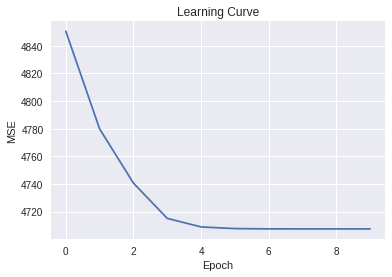

In [0]:
plt.plot(mses)
plt.title("Learning Curve")
plt.ylabel("MSE")
plt.xlabel("Epoch");

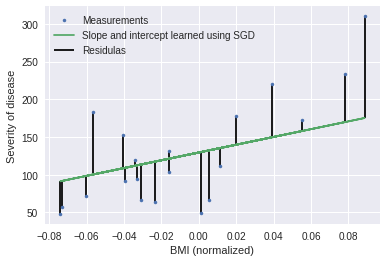

In [0]:
plt.plot(BMI, response, '.', label = "Measurements");
plt.plot(BMI, 515.6414*BMI + 129.4396, label = "Slope and intercept learned using SGD")
plt.vlines(BMI, response,  515.6414*BMI + 129.4396, label = "Residulas")
plt.legend();
plt.xlabel("BMI (normalized)")
plt.ylabel("Severity of disease");


In [0]:
# randomly initialize parameters 
torch.manual_seed(2)
print(torch.rand(2))

m = torch.randn(1,1)
b = torch.randn(1,1)
print(b)

alpha = .1
mses = []
batch_size = 1
for epoch in range(10):
    print("epoch", epoch)
    for i in range(0, X.size()[0], batch_size):

        preds = b + X[i:(i+batch_size),:]*m

        deltas = preds - y[i:i+batch_size]

        b = b - alpha*2*torch.mean(deltas)
        m = m - alpha*2*torch.mean(deltas*X[i:(i+batch_size),:])
        
    preds = b + X*m   
    mses.append(torch.mean((preds.squeeze() - y)**2))
    if alpha > 1e-9:
        alpha = alpha/(epoch+1)

tensor([0.6147, 0.3810])
tensor([[0.8984]])
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


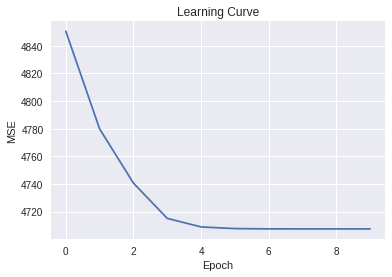

In [0]:
plt.plot(mses)
plt.title("Learning Curve")
plt.ylabel("MSE")
plt.xlabel("Epoch");

# Data loader

When we are iterating through the data for a single epoch, we have to do some book keeping on where we are along the iterations though the data. For example, if our batch size is not perfectly divisible by size of the data set, we have to add an exception on how to deal with the last left of batch of the data. Also, it is common to shuffle the order of the data after one epoch of training so if thats what we want to do then we have to take additional steps for that. There may be many other data transformation that we need to do on each batch before we pass through the model. 

This is where the `Dataset` and the `DataLoader` classes in PyTorch can really help us not to have to worry about the overhead of keeping track of indexes of the data, shuffling, and any other preparations we need.  To use this classes, we first make our own dataset class by inherriting from `Datset`. Our custom dataset class we overwrite three methods:

- `__init__()` : this is the constructor of the class where we can do any initializations we want for the dataset. Often the constructor is initialized with paths of where the data is located. 

- `__len__`: this method returns an integer of what the total dataset size should be

- `__getitem__`: this method return the subset of the data for our batch. It is customary to have one argument `idx` passed to this method that selects the subset of the data we want to return 


Lets use our diabetes dataset example. Instead of having to explicity convert the NumPy arrays to PyTorch tensors, we can do all this in this `__init__` constructor as we have done here. Note that because our dataset are small, this is very easy. In general if we have large datasets on disk, we might want to send only the paths to the data file. Note that in our constructor we have also defined the `self.device` instance variable to specify if we have GPU availability or not. We could have chosen to have placed all the data in the GPU at this point, but we save that for only when we need to return a batch of data. 



In [0]:
from torch.utils.data import Dataset, DataLoader


In [0]:
class DiabetesDataset(Dataset):


    def __init__(self, X, y):
        self.device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)


    def __len__(self):
        return self.X.size()[0]

    def __getitem__(self, idx):

        return self.X[idx].to(self.device), self.y[idx].to(self.device)

In [0]:
prepped_dataset = DiabetesDataset(BMI, response)

dataloader = DataLoader(prepped_dataset, batch_size=3,
                        shuffle=True)

In [0]:
for X_batch, y_bach in dataloader:
    print(X_batch.size())

torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([2, 1])


As you can see, we also overwrite the `__len__` method to specify the total size of the dataset that we have. Finally, the `__getitem__` method returns a tuple of `self.X[indx]` and `self.y[indx]` specified by the array `indx` that says which elements of the tensor to return. Note that here we have also passed the tensors to the device designated in the constructor. 


Having created the `DiabetesDataset` class,  we next instantiate it to create the `prepped_dataset` object. This object is then passed to the `DataLoader` class to instantiate the `dataloader` object. Here we specify that we want the data to be loaded with batches of size 4. We also indicate with `shuffle = True` that after an epoch, we should shuffle the order of the data (of course, this is dont by shuffling the indices that are used to return the data).

And that is it! `dataloader` is now a regular Python iterator that allows us to iteratre through batches of data. In our for loop example we jus print the size of the dataset. Note that since our dataset is not divisible by 3, the last batch is just whatever that is left over (just 2 examples in our case).

# Working with Automatic Differentiation and linear regression

The linear regression that we have consider has a simple mathematical form and calculating its derivatives for SGD is straightforward. But as you can imaging, computing derivatives for more complicated functions can be a huge challenge. Forunately, the computational graph framework that PyTorch follows makes taking derivatives of complicated mathematical models simple and *automatic.* Automatic differentiation is a large topic, but it is important to understand the gist of it to be able to better use it. 

As we discussed in Chapter 1, when we create models in PyTorch we create a computational graph. Computational graph does two types of computations: forward and backward computation (also called forward and backward pass). The forward pass is running the model with inputs to get a predicted output. So for our linear model example the forward pass is computing our hypothesized prediction $h = mx + b$ for a given input $x$ and a selected slope $m$ and intercept $b$ creates a prediction. 

But as you know, we are interested in training the model. So we want to also compute the models error. We would then take our hypothesized prediction $h$ and compare it with the actual output $y$, so we would have $r = h - y$. Since we are computing the mean *squared* error as our loss, we have to then compute $L = r^2$.

One forward pass takes us from $x, m,$ and $b$ to the hypothesized prediction $h$ and finally with the target desired output $y$ to the loss $L$. In other words the forward pass takes us from the provided inputs to the prediction and error. Of course we are not usually intersted in just computing predictions and errors, but we also want to update the model using SGD which means we have to compute the gradient of the Loss $L$ with respect to the parameters of the model. We discussed the math of this in an earlier section, but instead of computing the gradients ourselves, the *backward pass* computes the gradients for us. We will demonstrate this with an example graph for our linear regression problem:



![alt text](https://pbs.twimg.com/media/D08t3qoUcAAKDfr.jpg:small)


Like all graphs, the computational graph is collection of nodes and edges. The computational graph is in particular a directed graph, where the direction of the edges tell us the flow of computation and data. The nodes stores data (that is tensors) and the edges represetns function arguments. When there is a node that has incoming edge, then we know that the nodes value will be function of the data that is coming from the tail of the edge. In addition to node calculting the value of the function with the incomming edges, the node also keeps track of the derivative of each coming argument (incoming edge).

Lets unpack this with the example graph we have shown up above. The nodes labeled $x, m, b$, and $y$ have no incoming edges and hence they only store data and have no inputs. Let's follow the forward computations in this graph starting from the top two nodes $x$ and $m$. The edges from these new nodes take $x$ and $m$ to a node $z$. Note that since node $z$ has incoming edges, its value is calculated as a function of the data from coming from the tail of the edges. We have made this relationship explicit by writing the value of this node a a function $z(m, x)$ with the arguments corresponding to the tails of the edges. 

In this case we have defined the function for $z(m,x)$ to just be the product of the incoming tensors $m$ and $x$, so $z(m,x) = mx$. So when we compute a forward pass, for a given $x$ and $m$ we get the value of the node $z$ to be $z(m,x)$. But this node also keeps track of the derivatives with respect to the arguments (incoming edges). So the node $z$ in addition to keeping its value as $z(m,x)$, it also computes with respect to each edge (ie, argument of the functon) its derivative. So in our case our function has two arguments and hence we have two derivatives as hown. 

Moving along, we have the node $h$ that similarly has two incoming edges and is therefore also a function (note that the node $b$ has no incming edges, so the node only stores its value and not a function).  Again because $h(b, z) = z + b$ is a function of two arguments we have two derivatives with respet to each of the arguments (as shown along with the edges).  If we only wanted to make predictions using our model for a given input $x$, at this point we would be done and we would simple retrieve the value of $h(b, z)$.

But if we want to compute the error of this function for a given desired output $y$, we continue traversing down the graph. To compute the error, we first compute the residul in the node $r$ as $r(y, h) = h - y$. Again since $r(y, h)$ is just a function of two variables we have two derivatives associated with each of the respective incident edges. Finally, in our last node at the bottom $L(r)$, we have only one edge and so the node is a function of only one variable $L(r) = r^2$ and hence has only one derivate associated with the single edge. 

This completes the *forward pass* of the graph. Now of course we need to compute the gradients so that we can use SGD. This is where the backward pass comes. Specifically for SGD, recal that we need $\frac{\partial L}{\partial b}$ and $\frac{\partial L}{\partial m}$ (note that we have slightly abused the differential notation mixing between the $\partial$ and $d$ symbols interchangably). To compute the gradients we just follow the graph backward multiplying the gradients that the nodes have kept track of until we get to the argument we seek. 

So for computing $\frac{\partial L}{\partial b}$ we start from node $L$ and multiply the derivates of all intermediate nodes until node $b$. This means we have

$\frac{\partial L}{\partial b} = 2r\cdot1\cdot1$

where we have made the multiplcations of the unity derivatives explicit. Similarly for computing the gradient of the loss with respect to the slope $m$ we have 

$\frac{\partial L}{\partial m} = 2r\cdot1\cdot1\cdot x$

This is exactly the same gradients for the parameters that we computed before! Except this time we computed these as a series of compositional functions in the computational graph. While this is a simple example, the graph can be complicted expressing sophisticated functions. But because each node keeps track of its own value its derivatives with the incident edges, the computation of the graident of the entire function becomes simple. 

In [0]:
from IPython.core.debugger import set_trace

In [0]:

# randomly initialize parameters 
torch.manual_seed(2)

m = torch.randn(1,1,  requires_grad=True)
b = torch.randn(1,1,  requires_grad=True)


alpha = .1
mses = []
batch_size = 1
for epoch in range(10):
    print("epoch", epoch)
    for i in range(0, X.size()[0], batch_size):
        preds = b + X[i:(i+batch_size),:]*m
        
        loss = torch.mean((preds - y[i:(i+batch_size)])**2)
        loss.backward()
        
        with torch.no_grad():
            b -= alpha*b.grad
            m -= alpha*m.grad

            b.grad.zero_()
            m.grad.zero_()
        
    with torch.no_grad():
        preds = b + X*m   
        mses.append(torch.mean((preds.squeeze() - y)**2))
        b.grad.zero_()
        m.grad.zero_()
        
        
    if alpha > 1e-9:
        alpha = alpha/(epoch+1)

tensor([0.6147, 0.3810])
tensor([[0.8984]], requires_grad=True)
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


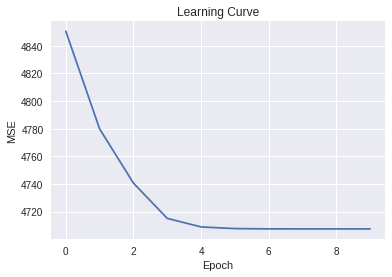

In [0]:
plt.plot(mses)
plt.title("Learning Curve")
plt.ylabel("MSE")
plt.xlabel("Epoch");

# The loss function: a mismatch between prediction and reality

In machine learning, we build models, algorithms, and computational methods that produce a desired output from a set of inputs. For example, we want to predict the value of a Tesla stock tomorrow based on its price from today and yesterday. In this case the output of the model is the future price of the stock and the inputs are today and yesterdays stock value. 

We often want these outputs be something that matches "truth." In the Tesla stock example, we want the predict of the model be as close as possible to the actual price of Tesla stock. *How * we measure the mismatch between our prediction and the actual value (ie, "truth") is critical step for building useful algorithms. This mismatch between our models outputs and the true values is often referred to as the loss or error function. 

The importance of defining the right loss function cannot be stressed enough and has always been a critical research topic in machine learning. It is easy for us as humans to qualitatively say if an answer is correct or not. But for us to *quantify numerically* the "incorrectness" of an answer is not clear. Even philosophically humans have strugged for centuries (if not millenia) on how to quantiatively *measure* progress. In such efforts humans have come up with many proxies that seem to be correlated with desired properties we want. For example, SAT scores can be thought of as a sensible  measure of a student's performance in college. However, numerous researchers will point out that SAT scores alonre are a poor measure of the general (or specific) intelligence of an individual. As a result numerous alternative measures and performance metrics are designed to serve as assessments.

Similarly in machine learning, there are numerous loss functions that are quantitative ways of measuring the mismatch between the algorithms prediction and truth. Although there are many standard loss functions used and we will cover (such as cross-entropy and least squares), there will come a time for most machine learning practioners where they have to design a new loss function for the specific problem at hand. 



In [0]:
class RandomProjLoss(torch.nn.Module):
    
    def __init__(self, num_proj, N_in, N_out=2):
        super(RandomProjLoss,self).__init__()
        self.projection_matrix = []
        for _ in range(num_proj):
            self.projection_matrix.append(torch.randn(N_in,N_out))
        self.loss_func = nn.MSELoss()
        
    def forward(self,x,y):
      
        total_loss = 0
        for projection_matrix in self.projection_matrix:
            projected_x = torch.sum(x*projection_matrix, dim = 1)
            projected_y = torch.sum(y*projection_matrix, dim = 1)
            
            total_loss += self.loss_func(projected_x, projected_y)
        
        
        return 0.1*total_loss/len(self.projection_matrix) + 10*self.loss_func(x,y)

Here we are considering a rather exotic custom loss function.  The RandomProj loss is for predicitng not a single scalar but rather an antire tensor. The way it works is that it uses the principle of random projection matrices based off of the Johnson-Lindenstrauss limma that Euclidean distances under random projections are mostly preserved. While the idea of random projections may sound exotic, it is not uncommon for high dimensional datasets to be projected down to lower dimensional data sets (this is done in this paper for example: https://arxiv.org/abs/1705.07831)



# The ADALINE: Training a Neural Network Class


So far we have shown how to build a model with specific parameters and basic arithmetic operations such as addition and multiplication. These operations are so common that PyTorch has the convineint `torch.nn` for wrapping a model in a class. The `torch.nn`module has a number of models and transformation (such as diffrent types of layers and activation functions) that we can use instead of writing our own. 

In neural networks, the linear regression architecture is a classic model that was originally introduced by Widrow and Hoff as the ADALINE (Adaptive Linear Neuron) with a stochastic update rule that is the same as the SGD rule we have covered. This linear transformation can be accomplished with the `nn.Linear` function instead of us having to explicitly write our own transformation as we have done. 

In [0]:
class Adaline(torch.nn.Module):
    def __init__(self, N_in, N_out = 1):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(Adaline, self).__init__()
        self.linear = torch.nn.Linear(N_in, N_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.linear(x)

In [0]:

# randomly initialize parameters 
torch.manual_seed(2)
print(torch.rand(2))

m = torch.randn(1,1,  requires_grad=True)
b = torch.randn(1,1,  requires_grad=True)

model = Adaline(N_in = 1, N_out = 1)

model.linear.weight.data[0] = m
model.linear.bias.data[0] = b



alpha = .1
mses = []
batch_size = 1
for epoch in range(10):
    print("epoch", epoch)
    for i in range(0, X.size()[0], batch_size):
        preds = model(X[i:i+batch_size,:])
        
        loss = torch.mean((preds - y[i:(i+batch_size)])**2)
        
        model.zero_grad()
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= alpha * param.grad    
                

        
    with torch.no_grad():
        preds = model(X)  
        mses.append(torch.mean((preds.squeeze() - y)**2))
        model.zero_grad()
        
        
    if alpha > 1e-9:
        alpha = alpha/(epoch+1)

tensor([0.6147, 0.3810])
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9


In [0]:
mses[-1]

tensor(4707.5166)

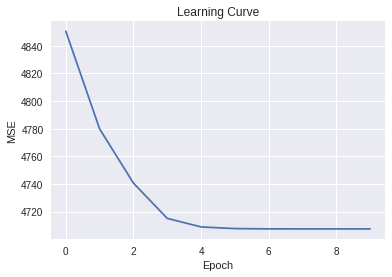

In [0]:
plt.plot(mses)
plt.title("Learning Curve")
plt.ylabel("MSE")
plt.xlabel("Epoch");

When we create our own network model in PyTorch we should inherit from the `torch.nn.Module` class as we have shown to take advatange of the PyTorch network API. In the constructor method (`__init__`) we can specify the instansce varibales needed to initialize the model. Since we have a simple linear model, we only need to specify one layer (`self.linear = torch.nn.Linear(N_in, N_out)`). We have made the number of inputs `N_in` and the number of outputs `N_out` generic, but for our simple example we have consider both of them 1. 

We next to write our own `forward` method to specify how we want to manipulate the input. As you can see, we just want to pass our input through the linear transformation we defined in the constructor `self.linear`. And that's it! That is our model!

To show that the results of training this model match what we had before, we actual manually set the initialized parameters of the weights of the model with the same weights used ot train the previous models. As you can see, we get the same results. 